Includes:

Cleaning up the seasonal aggregates, dropping features with low variance and/or meaningless such as number of observations (nob)

Calculating and adding some statistics in addition to the seasonal aggregtes

Pivoting the aggregtes around the season feature

Merging the climate dataset with the soil stats

Adding yield stats to the dataset

(despite being called "weighted" these weather statistics are actually not weighted, but to calculate them I used the same function I created to calculate weighted features, and did not change the naming in it)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Aggregating

In [3]:
weather_data = pd.read_csv("C:/Users/Dima/Desktop/MIP/stations/seasonal_aggregates_unweigted.csv")
weather_data.head()

,Region,Year,Season,rain_weighted_mean,rain_weighted_std,rain_weighted_sum,rain_weighted_nobs,rain_weighted_p10,rain_weighted_p90,num_rainy_days,...,rh_tmax_weighted_sum,rh_tmax_weighted_nobs,rh_tmax_weighted_p10,rh_tmax_weighted_p90,rh_tmin_weighted_mean,rh_tmin_weighted_std,rh_tmin_weighted_sum,rh_tmin_weighted_nobs,rh_tmin_weighted_p10,rh_tmin_weighted_p90
0,NSW Barwon Darling,2006,Flowering,0.947149,3.553518,5050.2,5332.0,0.0,2.0,1.137696,...,145508.3,5332.0,14.7,40.6,59.398125,18.811649,316710.8,5332.0,34.7,84.5
1,NSW Barwon Darling,2006,Growing,0.593642,2.477509,3165.3,5332.0,0.0,0.6,1.007839,...,127924.0,5332.0,13.2,31.7,54.034415,16.135505,288111.5,5332.0,33.5,75.6
2,NSW Barwon Darling,2006,Harvesting,0.215650,1.965174,2262.6,10492.0,0.0,0.0,0.585017,...,335644.3,10492.0,22.6,42.3,84.172093,15.605183,883133.6,10492.0,60.8,100.0
3,NSW Barwon Darling,2006,Maturation,0.928952,3.893367,9427.0,10148.0,0.0,1.8,1.900653,...,287221.5,10148.0,14.0,44.6,62.687347,19.884141,636151.2,10148.0,36.2,91.6
4,NSW Barwon Darling,2006,Planting,0.385205,2.212524,3114.0,8084.0,0.0,0.1,0.868655,...,174209.6,8084.0,9.9,34.5,54.265933,21.029856,438685.8,8084.0,28.6,86.9


In [4]:
weather_data.groupby(['Year', "Season"])["Region"].count().reset_index()

,Year,Season,Region
0,2006,Flowering,12
1,2006,Growing,12
2,2006,Harvesting,12
3,2006,Maturation,12
4,2006,Planting,12
...,...,...,...
70,2020,Flowering,12
71,2020,Growing,12
72,2020,Harvesting,12
73,2020,Maturation,12


In [5]:
nan_count_per_column = weather_data.isna().sum()
print((len(weather_data) - nan_count_per_column[nan_count_per_column > 0]) / len(weather_data))

Series([], dtype: float64)


In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 900 non-null    object 
 1   Year                   900 non-null    int64  
 2   Season                 900 non-null    object 
 3   rain_weighted_mean     900 non-null    float64
 4   rain_weighted_std      900 non-null    float64
 5   rain_weighted_sum      900 non-null    float64
 6   rain_weighted_nobs     900 non-null    float64
 7   rain_weighted_p10      900 non-null    float64
 8   rain_weighted_p90      900 non-null    float64
 9   num_rainy_days         900 non-null    float64
 10  rad_weighted_mean      900 non-null    float64
 11  rad_weighted_std       900 non-null    float64
 12  rad_weighted_sum       900 non-null    float64
 13  rad_weighted_nobs      900 non-null    float64
 14  rad_weighted_p10       900 non-null    float64
 15  rad_we

In [7]:
for c in weather_data.columns:
    if "nobs" in c:
        weather_data.drop(c, axis = 1, inplace = True)

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 900 non-null    object 
 1   Year                   900 non-null    int64  
 2   Season                 900 non-null    object 
 3   rain_weighted_mean     900 non-null    float64
 4   rain_weighted_std      900 non-null    float64
 5   rain_weighted_sum      900 non-null    float64
 6   rain_weighted_p10      900 non-null    float64
 7   rain_weighted_p90      900 non-null    float64
 8   num_rainy_days         900 non-null    float64
 9   rad_weighted_mean      900 non-null    float64
 10  rad_weighted_std       900 non-null    float64
 11  rad_weighted_sum       900 non-null    float64
 12  rad_weighted_p10       900 non-null    float64
 13  rad_weighted_p90       900 non-null    float64
 14  et_weighted_mean       900 non-null    float64
 15  et_wei

In [9]:
for c in weather_data.columns:
    length = len(weather_data[c].unique())
    if length < 10:
        print(c, ":  ", length)

Season :   5
rain_weighted_p10 :   1


Dropping reain_weighted_p10, since it has only 1 value

In [10]:
weather_data.drop("rain_weighted_p10", axis = 1, inplace = True)

In [11]:
for c in weather_data.columns:
    length = len(weather_data[c].unique())
    if length < 10:
        print(c, ":  ", length)

Season :   5


In [12]:
for c in weather_data.columns:
    if "maxt" in c or "mint" in c:
        print(c)

maxt_weighted_mean
maxt_weighted_std
maxt_weighted_sum
maxt_weighted_p10
maxt_weighted_p90
mint_weighted_mean
mint_weighted_std
mint_weighted_sum
mint_weighted_p10
mint_weighted_p90


In [13]:
weather_data["temp_range_wieghted_mean"] = weather_data["maxt_weighted_mean"] - weather_data["mint_weighted_mean"]
weather_data.drop(["maxt_weighted_mean", "mint_weighted_mean"], axis = 1, inplace = True)

In [14]:
weather_data.columns[3:]

Index(['rain_weighted_mean', 'rain_weighted_std', 'rain_weighted_sum',
       'rain_weighted_p90', 'num_rainy_days', 'rad_weighted_mean',
       'rad_weighted_std', 'rad_weighted_sum', 'rad_weighted_p10',
       'rad_weighted_p90', 'et_weighted_mean', 'et_weighted_std',
       'et_weighted_sum', 'et_weighted_p10', 'et_weighted_p90',
       'maxt_weighted_std', 'maxt_weighted_sum', 'maxt_weighted_p10',
       'maxt_weighted_p90', 'mint_weighted_std', 'mint_weighted_sum',
       'mint_weighted_p10', 'mint_weighted_p90', 'num_hot_days',
       'num_frost_days', 'gdd', 'rh_tmax_weighted_mean',
       'rh_tmax_weighted_std', 'rh_tmax_weighted_sum', 'rh_tmax_weighted_p10',
       'rh_tmax_weighted_p90', 'rh_tmin_weighted_mean', 'rh_tmin_weighted_std',
       'rh_tmin_weighted_sum', 'rh_tmin_weighted_p10', 'rh_tmin_weighted_p90',
       'temp_range_wieghted_mean'],
      dtype='object')

In [15]:
for c in weather_data.columns:
    if ("sum" in c) and ("rad" not in c):
        weather_data.drop(c, axis = 1, inplace = True)

In [16]:
weather_data.columns[3:]

Index(['rain_weighted_mean', 'rain_weighted_std', 'rain_weighted_p90',
       'num_rainy_days', 'rad_weighted_mean', 'rad_weighted_std',
       'rad_weighted_sum', 'rad_weighted_p10', 'rad_weighted_p90',
       'et_weighted_mean', 'et_weighted_std', 'et_weighted_p10',
       'et_weighted_p90', 'maxt_weighted_std', 'maxt_weighted_p10',
       'maxt_weighted_p90', 'mint_weighted_std', 'mint_weighted_p10',
       'mint_weighted_p90', 'num_hot_days', 'num_frost_days', 'gdd',
       'rh_tmax_weighted_mean', 'rh_tmax_weighted_std', 'rh_tmax_weighted_p10',
       'rh_tmax_weighted_p90', 'rh_tmin_weighted_mean', 'rh_tmin_weighted_std',
       'rh_tmin_weighted_p10', 'rh_tmin_weighted_p90',
       'temp_range_wieghted_mean'],
      dtype='object')

In [17]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region                    900 non-null    object 
 1   Year                      900 non-null    int64  
 2   Season                    900 non-null    object 
 3   rain_weighted_mean        900 non-null    float64
 4   rain_weighted_std         900 non-null    float64
 5   rain_weighted_p90         900 non-null    float64
 6   num_rainy_days            900 non-null    float64
 7   rad_weighted_mean         900 non-null    float64
 8   rad_weighted_std          900 non-null    float64
 9   rad_weighted_sum          900 non-null    float64
 10  rad_weighted_p10          900 non-null    float64
 11  rad_weighted_p90          900 non-null    float64
 12  et_weighted_mean          900 non-null    float64
 13  et_weighted_std           900 non-null    float64
 14  et_weighte

In [18]:
def get_corr_matrix(df, t = 0.8):
    corr_matrix = df.corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > t)]

    corr = df[to_drop].corr().abs()
    plt.figure(figsize = (12, 10))
    sns.heatmap(corr, cmap = "coolwarm", fmt="0.1", annot=True)

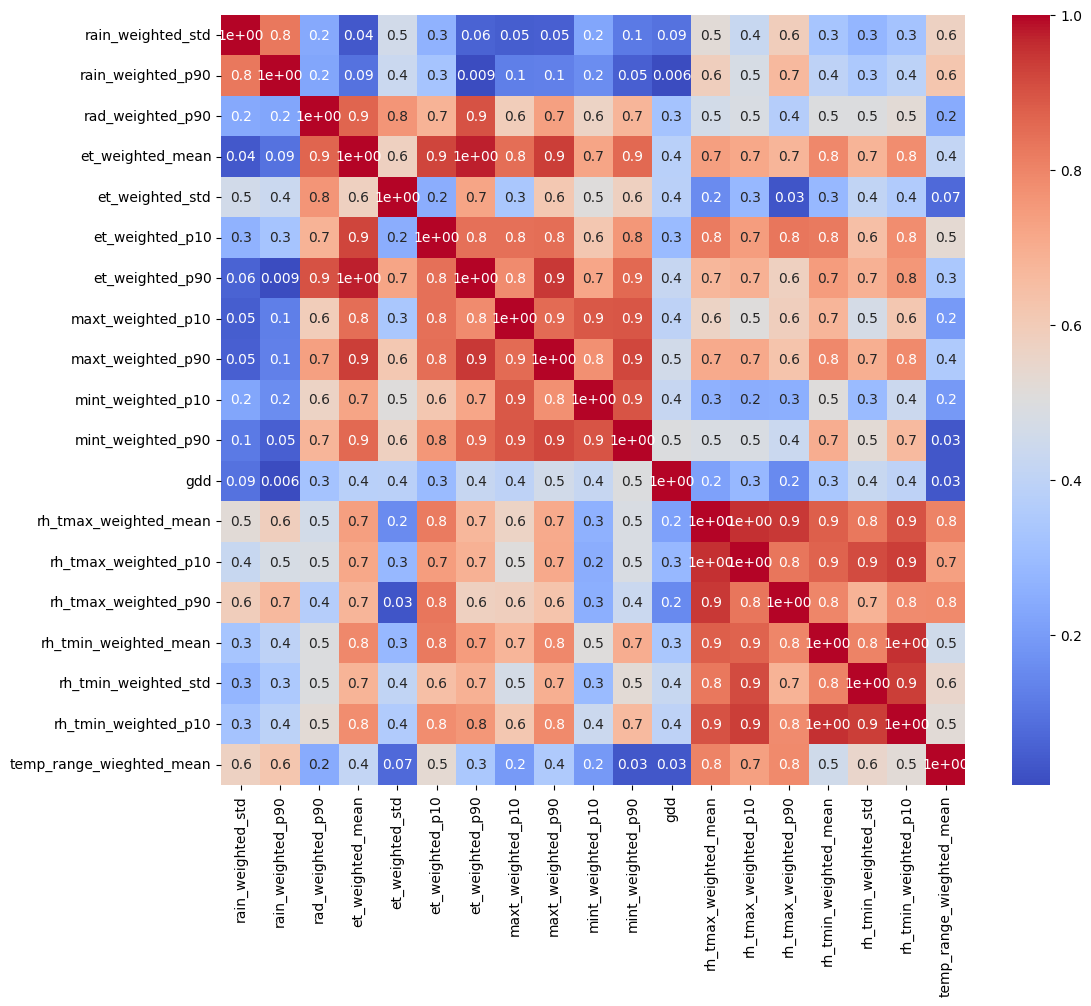

In [19]:
get_corr_matrix(weather_data[weather_data.columns[3:]])

In [20]:
weather_data.drop(["maxt_weighted_p10", "mint_weighted_p90"], axis = 1, inplace = True)

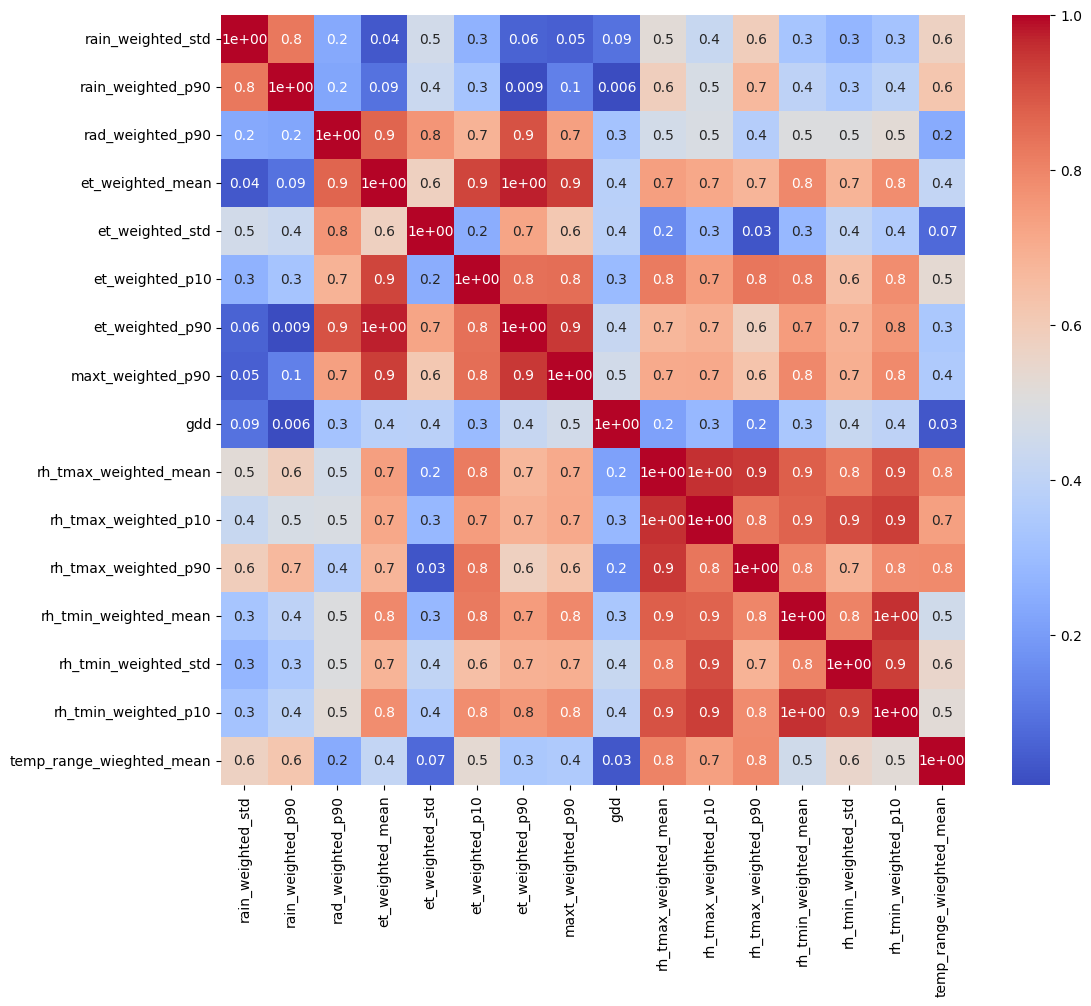

In [21]:
get_corr_matrix(weather_data[weather_data.columns[3:]])

In [22]:
weather_data.columns

Index(['Region', 'Year', 'Season', 'rain_weighted_mean', 'rain_weighted_std',
       'rain_weighted_p90', 'num_rainy_days', 'rad_weighted_mean',
       'rad_weighted_std', 'rad_weighted_sum', 'rad_weighted_p10',
       'rad_weighted_p90', 'et_weighted_mean', 'et_weighted_std',
       'et_weighted_p10', 'et_weighted_p90', 'maxt_weighted_std',
       'maxt_weighted_p90', 'mint_weighted_std', 'mint_weighted_p10',
       'num_hot_days', 'num_frost_days', 'gdd', 'rh_tmax_weighted_mean',
       'rh_tmax_weighted_std', 'rh_tmax_weighted_p10', 'rh_tmax_weighted_p90',
       'rh_tmin_weighted_mean', 'rh_tmin_weighted_std', 'rh_tmin_weighted_p10',
       'rh_tmin_weighted_p90', 'temp_range_wieghted_mean'],
      dtype='object')

In [23]:
def saturation_vapor_pressure(T):
    #Compute saturation vapor pressure
    return 0.6108 * np.exp((17.27 * T) / (T + 237.3))

In [24]:
def compute_vpd(df, tmax_col, rh_tmax_col, tmin_col, rh_tmin_col):

    #Saturation vapor pressure
    es_tmax = saturation_vapor_pressure(df[tmax_col])
    es_tmin = saturation_vapor_pressure(df[tmin_col])

    #Daytime VPD
    df["VPD_day"] = es_tmax * (1 - df[rh_tmax_col] / 100.0)

    #Nighttime VPD
    df["VPD_night"] = es_tmin * (1 - df[rh_tmin_col] / 100.0)

    return df

In [25]:
weather_data = compute_vpd(weather_data, "maxt_weighted_p90", "rh_tmax_weighted_mean", "mint_weighted_p10", "rh_tmin_weighted_mean")
weather_data.head()

,Region,Year,Season,rain_weighted_mean,rain_weighted_std,rain_weighted_p90,num_rainy_days,rad_weighted_mean,rad_weighted_std,rad_weighted_sum,...,rh_tmax_weighted_std,rh_tmax_weighted_p10,rh_tmax_weighted_p90,rh_tmin_weighted_mean,rh_tmin_weighted_std,rh_tmin_weighted_p10,rh_tmin_weighted_p90,temp_range_wieghted_mean,VPD_day,VPD_night
0,NSW Barwon Darling,2006,Flowering,0.947149,3.553518,2.0,1.137696,27.034059,5.804725,144145.6,...,10.010731,14.7,40.6,59.398125,18.811649,34.7,84.5,13.963428,5.899137,1.022243
1,NSW Barwon Darling,2006,Growing,0.593642,2.477509,0.6,1.007839,25.498668,7.579642,135958.9,...,10.789749,13.2,31.7,54.034415,16.135505,33.5,75.6,14.363297,5.145298,0.711302
2,NSW Barwon Darling,2006,Harvesting,0.215650,1.965174,0.0,0.585017,16.255814,3.435585,170556.0,...,8.482967,22.6,42.3,84.172093,15.605183,60.8,100.0,15.727307,2.820138,0.106215
3,NSW Barwon Darling,2006,Maturation,0.928952,3.893367,1.8,1.900653,23.181898,5.875273,235249.9,...,12.016881,14.0,44.6,62.687347,19.884141,36.2,91.6,14.252109,5.488566,0.674130
4,NSW Barwon Darling,2006,Planting,0.385205,2.212524,0.1,0.868655,26.479095,6.481446,214057.0,...,10.871944,9.9,34.5,54.265933,21.029856,28.6,86.9,16.033300,5.755408,0.546720


In [26]:
weather_data.drop(["rh_tmax_weighted_p10", "rh_tmax_weighted_mean", "rh_tmax_weighted_p90", "rh_tmin_weighted_p10", "rh_tmin_weighted_mean", "rh_tmin_weighted_p90"], axis = 1, inplace = True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region                    900 non-null    object 
 1   Year                      900 non-null    int64  
 2   Season                    900 non-null    object 
 3   rain_weighted_mean        900 non-null    float64
 4   rain_weighted_std         900 non-null    float64
 5   rain_weighted_p90         900 non-null    float64
 6   num_rainy_days            900 non-null    float64
 7   rad_weighted_mean         900 non-null    float64
 8   rad_weighted_std          900 non-null    float64
 9   rad_weighted_sum          900 non-null    float64
 10  rad_weighted_p10          900 non-null    float64
 11  rad_weighted_p90          900 non-null    float64
 12  et_weighted_mean          900 non-null    float64
 13  et_weighted_std           900 non-null    float64
 14  et_weighte

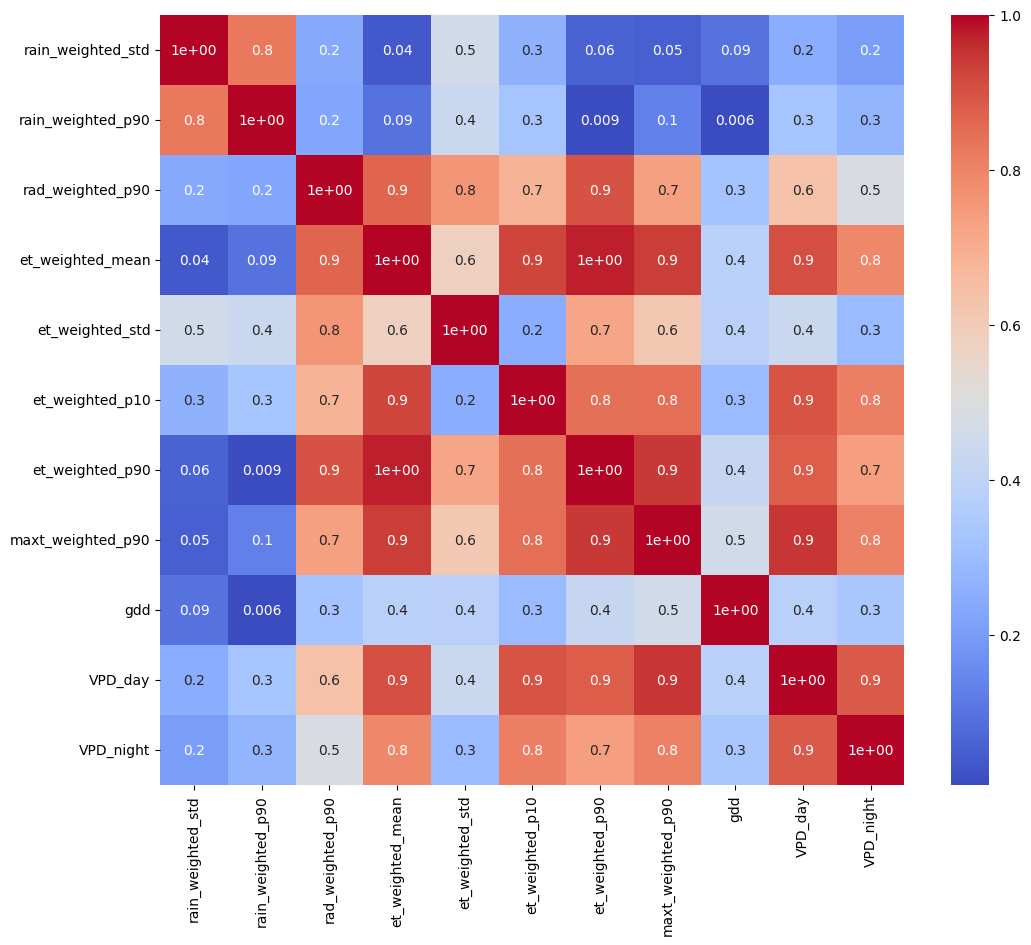

In [27]:
get_corr_matrix(weather_data[weather_data.columns[3:]])

In [28]:
weather_data.drop("rad_weighted_p90", axis = 1, inplace = True)

In [29]:
weather_data.columns

Index(['Region', 'Year', 'Season', 'rain_weighted_mean', 'rain_weighted_std',
       'rain_weighted_p90', 'num_rainy_days', 'rad_weighted_mean',
       'rad_weighted_std', 'rad_weighted_sum', 'rad_weighted_p10',
       'et_weighted_mean', 'et_weighted_std', 'et_weighted_p10',
       'et_weighted_p90', 'maxt_weighted_std', 'maxt_weighted_p90',
       'mint_weighted_std', 'mint_weighted_p10', 'num_hot_days',
       'num_frost_days', 'gdd', 'rh_tmax_weighted_std', 'rh_tmin_weighted_std',
       'temp_range_wieghted_mean', 'VPD_day', 'VPD_night'],
      dtype='object')

#### Season Pivoting

In [30]:
weather_data.columns

Index(['Region', 'Year', 'Season', 'rain_weighted_mean', 'rain_weighted_std',
       'rain_weighted_p90', 'num_rainy_days', 'rad_weighted_mean',
       'rad_weighted_std', 'rad_weighted_sum', 'rad_weighted_p10',
       'et_weighted_mean', 'et_weighted_std', 'et_weighted_p10',
       'et_weighted_p90', 'maxt_weighted_std', 'maxt_weighted_p90',
       'mint_weighted_std', 'mint_weighted_p10', 'num_hot_days',
       'num_frost_days', 'gdd', 'rh_tmax_weighted_std', 'rh_tmin_weighted_std',
       'temp_range_wieghted_mean', 'VPD_day', 'VPD_night'],
      dtype='object')

In [31]:
pivoting_tables = weather_data.columns[4:]
pivoting_tables

Index(['rain_weighted_std', 'rain_weighted_p90', 'num_rainy_days',
       'rad_weighted_mean', 'rad_weighted_std', 'rad_weighted_sum',
       'rad_weighted_p10', 'et_weighted_mean', 'et_weighted_std',
       'et_weighted_p10', 'et_weighted_p90', 'maxt_weighted_std',
       'maxt_weighted_p90', 'mint_weighted_std', 'mint_weighted_p10',
       'num_hot_days', 'num_frost_days', 'gdd', 'rh_tmax_weighted_std',
       'rh_tmin_weighted_std', 'temp_range_wieghted_mean', 'VPD_day',
       'VPD_night'],
      dtype='object')

In [32]:
pivoted_weather = weather_data.pivot_table(
    index = ["Region", "Year"], 
    columns = "Season", 
    values = "rain_weighted_mean"
).add_prefix("rain_weighted_mean" + "_").reset_index()
pivoted_weather

Season,Region,Year,rain_weighted_mean_Flowering,rain_weighted_mean_Growing,rain_weighted_mean_Harvesting,rain_weighted_mean_Maturation,rain_weighted_mean_Planting
0,NSW Barwon Darling,2006,0.947149,0.593642,0.215650,0.928952,0.385205
1,NSW Barwon Darling,2007,1.370311,4.260221,1.292213,1.062337,1.661714
2,NSW Barwon Darling,2008,2.526219,1.306058,0.151554,1.519331,1.726534
3,NSW Barwon Darling,2009,0.828395,3.062959,1.250162,1.841417,0.968617
4,NSW Barwon Darling,2010,1.795255,3.112434,0.951277,3.057568,3.547551
...,...,...,...,...,...,...,...
175,QLD Moonie,2016,2.901210,0.781660,0.061250,1.110208,1.407622
176,QLD Moonie,2017,1.383468,1.679713,0.780208,2.765784,2.921494
177,QLD Moonie,2018,0.048790,1.586578,0.405000,2.355403,1.710671
178,QLD Moonie,2019,0.002621,0.314344,0.329583,1.065466,0.106555


In [33]:
for c in weather_data.columns[4:]:
    frame = weather_data.pivot_table(
        index = ["Region", "Year"], 
        columns = "Season", 
        values = c
    ).add_prefix(c + "_").reset_index()
    pivoted_weather = pivoted_weather.merge(frame, on = ["Region", "Year"], how = "left")

In [34]:
pivoted_weather

Season,Region,Year,rain_weighted_mean_Flowering,rain_weighted_mean_Growing,rain_weighted_mean_Harvesting,rain_weighted_mean_Maturation,rain_weighted_mean_Planting,rain_weighted_std_Flowering,rain_weighted_std_Growing,rain_weighted_std_Harvesting,...,VPD_day_Flowering,VPD_day_Growing,VPD_day_Harvesting,VPD_day_Maturation,VPD_day_Planting,VPD_night_Flowering,VPD_night_Growing,VPD_night_Harvesting,VPD_night_Maturation,VPD_night_Planting
0,NSW Barwon Darling,2006,0.947149,0.593642,0.215650,0.928952,0.385205,3.553518,2.477509,1.965174,...,5.899137,5.145298,2.820138,5.488566,5.755408,1.022243,0.711302,0.106215,0.674130,0.546720
1,NSW Barwon Darling,2007,1.370311,4.260221,1.292213,1.062337,1.661714,4.480405,11.535689,5.968977,...,5.361509,3.778448,2.886535,5.098269,3.863934,0.712304,0.373981,0.188613,0.625116,0.456187
2,NSW Barwon Darling,2008,2.526219,1.306058,0.151554,1.519331,1.726534,8.088823,4.962344,0.965476,...,4.351518,4.963556,2.532866,3.866605,4.280197,0.526913,0.514434,0.117299,0.327604,0.406894
3,NSW Barwon Darling,2009,0.828395,3.062959,1.250162,1.841417,0.968617,3.238299,11.091936,4.664599,...,5.495066,5.333821,2.452192,5.029526,6.095803,0.785287,0.613057,0.087637,0.473030,0.457008
4,NSW Barwon Darling,2010,1.795255,3.112434,0.951277,3.057568,3.547551,6.918386,8.590272,3.987852,...,5.297675,3.279575,2.399942,3.255644,2.718151,0.587988,0.216473,0.054969,0.282618,0.118929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,QLD Moonie,2016,2.901210,0.781660,0.061250,1.110208,1.407622,7.276744,2.540428,0.374831,...,4.131035,5.487799,3.610760,4.325876,2.989888,0.438419,0.419581,0.191547,0.420216,0.106922
176,QLD Moonie,2017,1.383468,1.679713,0.780208,2.765784,2.921494,4.443195,4.865012,3.837480,...,5.566930,4.846578,2.526925,5.046566,3.847678,0.771357,0.401778,0.096943,0.422834,0.299184
177,QLD Moonie,2018,0.048790,1.586578,0.405000,2.355403,1.710671,0.417701,6.141871,2.687823,...,5.455847,5.057784,3.431111,4.518440,3.445204,0.736848,0.562644,0.169020,0.334320,0.188221
178,QLD Moonie,2019,0.002621,0.314344,0.329583,1.065466,0.106555,0.033798,1.396945,2.031061,...,5.675013,6.276689,2.922170,4.908024,4.790539,0.999094,0.658472,0.178350,0.628337,0.426261


In [33]:
pivoted_weather.to_csv("pivoted_weather_seasonal.csv", index = False)

### Merging

In [35]:
pivoted_weather = pd.read_csv("pivoted_weather_seasonal.csv")

In [36]:
soil_data = pd.read_csv("C:/Users/Dima/Desktop/MIP/soil/soil_binned.csv")
soil_data.head()

,RegionName,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,type_4,type_5,type_6,type_7,type_8,type_9,type_10,type_11,type_12,type_13
0,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,0.006227,0.003278,0.000038,0.033058,0.325764,0.000058,0.000747,0.000070,0.000000,0.0
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,0.031734,0.000015,0.000000,0.011035,0.593589,0.000000,0.002571,0.000013,0.000000,0.0
2,QLD Moonie,0.742361,0.257634,0.000005,0.000000,0.000000,0.000000,0.000000,0.999994,0.000006,...,0.000943,0.000000,0.000000,0.002139,0.267597,0.000000,0.000002,0.000000,0.000000,0.0
3,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,0.196791,0.001963,0.004380,0.197636,0.168374,0.000029,0.001234,0.000000,0.000029,0.0
4,NSW Lower Darling,0.510316,0.487054,0.002530,0.000100,0.000000,0.000000,0.000000,0.909281,0.090719,...,0.178730,0.000000,0.000000,0.021655,0.118324,0.000000,0.001021,0.514081,0.000000,0.0


In [37]:
soil_data.rename(columns = {"RegionName" : "Region"}, inplace = True)
soil_data.head()

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,type_4,type_5,type_6,type_7,type_8,type_9,type_10,type_11,type_12,type_13
0,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,0.006227,0.003278,0.000038,0.033058,0.325764,0.000058,0.000747,0.000070,0.000000,0.0
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,0.031734,0.000015,0.000000,0.011035,0.593589,0.000000,0.002571,0.000013,0.000000,0.0
2,QLD Moonie,0.742361,0.257634,0.000005,0.000000,0.000000,0.000000,0.000000,0.999994,0.000006,...,0.000943,0.000000,0.000000,0.002139,0.267597,0.000000,0.000002,0.000000,0.000000,0.0
3,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,0.196791,0.001963,0.004380,0.197636,0.168374,0.000029,0.001234,0.000000,0.000029,0.0
4,NSW Lower Darling,0.510316,0.487054,0.002530,0.000100,0.000000,0.000000,0.000000,0.909281,0.090719,...,0.178730,0.000000,0.000000,0.021655,0.118324,0.000000,0.001021,0.514081,0.000000,0.0


In [38]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    12 non-null     object 
 1   n_bin_0   12 non-null     float64
 2   n_bin_1   12 non-null     float64
 3   n_bin_2   12 non-null     float64
 4   n_bin_3   12 non-null     float64
 5   n_bin_4   12 non-null     float64
 6   n_bin_5   12 non-null     float64
 7   n_bin_6   12 non-null     float64
 8   p_bin_0   12 non-null     float64
 9   p_bin_1   12 non-null     float64
 10  p_bin_2   12 non-null     float64
 11  p_bin_3   12 non-null     float64
 12  p_bin_4   12 non-null     float64
 13  p_bin_5   12 non-null     float64
 14  p_bin_6   12 non-null     float64
 15  ph_bin_0  12 non-null     float64
 16  ph_bin_1  12 non-null     float64
 17  ph_bin_2  12 non-null     float64
 18  ph_bin_3  12 non-null     float64
 19  ph_bin_4  12 non-null     float64
 20  type_1    12 non-null     float64


In [39]:
yield_data = pd.read_csv("C:/Users/Dima/Desktop/MIP/yield_data.csv")
yield_data.head()

,Year,MDB,Region,Production,Commodity_price,GVIAP,Area_watered,Volume_applied,Missing Area_watered,Missing Volume_applied
0,2006,sMDB,NSW Murray Above,213.352283,2283.561906,4.872031e+05,111.246790,857.143859,0,0
1,2006,nMDB,NSW Barwon Darling,48193.357590,2283.561906,1.100525e+08,31006.514096,214441.653996,0,0
2,2006,nMDB,NSW Border Rivers,46638.139300,2283.561906,1.065011e+08,29672.250000,186773.362330,0,0
3,2006,nMDB,NSW Lachlan,13365.844220,2283.561906,3.052173e+07,5000.705000,51846.057390,0,0
4,2006,nMDB,NSW Gwydir,94323.790200,2283.561906,2.153942e+08,31173.000000,196219.903240,0,0


In [40]:
yield_data = yield_data[["Region", "Year", "Production"]]
yield_data.head()

,Region,Year,Production
0,NSW Murray Above,2006,213.352283
1,NSW Barwon Darling,2006,48193.357590
2,NSW Border Rivers,2006,46638.139300
3,NSW Lachlan,2006,13365.844220
4,NSW Gwydir,2006,94323.790200


In [41]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      175 non-null    object 
 1   Year        175 non-null    int64  
 2   Production  175 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [42]:
region_yeilds = soil_data.copy()

In [43]:
region_yeilds = region_yeilds.merge(yield_data, on = "Region", how = "right")
region_yeilds

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,type_6,type_7,type_8,type_9,type_10,type_11,type_12,type_13,Year,Production
0,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,0.004380,0.197636,0.168374,2.937375e-05,0.001234,0.000000,2.937375e-05,0.000000,2006,213.352283
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,0.000000,0.011035,0.593589,0.000000e+00,0.002571,0.000013,0.000000e+00,0.000000,2006,48193.357590
2,NSW Border Rivers,0.133807,0.675725,0.189032,0.001422,0.000014,0.000000,0.000000,0.678183,0.306903,...,0.012773,0.168647,0.065390,3.148609e-05,0.059489,0.000000,4.142907e-07,0.000000,2006,46638.139300
3,NSW Lachlan,0.543935,0.413001,0.043039,0.000025,0.000000,0.000000,0.000000,0.808373,0.180452,...,0.000430,0.022888,0.272023,0.000000e+00,0.017112,0.000331,2.548976e-07,0.000121,2006,13365.844220
4,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,0.005651,0.120695,0.014879,0.000000e+00,0.014903,0.000000,1.295201e-06,0.000000,2006,94323.790200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,0.005651,0.120695,0.014879,0.000000e+00,0.014903,0.000000,1.295201e-06,0.000000,2020,11488.711627
171,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.000000,0.959824,0.038245,...,0.005161,0.065984,0.027827,8.438534e-06,0.012983,0.000000,0.000000e+00,0.000000,2020,2398.325021
172,NSW Namoi,0.350251,0.593654,0.055366,0.000706,0.000017,0.000005,0.000001,0.758784,0.212159,...,0.001881,0.135747,0.004156,7.786928e-07,0.007740,0.000011,0.000000e+00,0.000004,2020,14900.278902
173,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,0.000038,0.033058,0.325764,5.787290e-05,0.000747,0.000070,0.000000e+00,0.000000,2020,6589.852195


In [44]:
region_yeilds = region_yeilds.merge(pivoted_weather, on = ["Region", "Year"], how = "left")
region_yeilds

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,VPD_day_Flowering,VPD_day_Growing,VPD_day_Harvesting,VPD_day_Maturation,VPD_day_Planting,VPD_night_Flowering,VPD_night_Growing,VPD_night_Harvesting,VPD_night_Maturation,VPD_night_Planting
0,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,4.291569,4.013163,1.295845,3.685979,3.540050,0.186575,0.227529,0.015096,0.100672,0.101948
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,5.899137,5.145298,2.820138,5.488566,5.755408,1.022243,0.711302,0.106215,0.674130,0.546720
2,NSW Border Rivers,0.133807,0.675725,0.189032,0.001422,0.000014,0.000000,0.000000,0.678183,0.306903,...,3.230407,3.356037,2.318447,2.943764,2.840368,0.128166,0.115929,0.020060,0.071082,0.074541
3,NSW Lachlan,0.543935,0.413001,0.043039,0.000025,0.000000,0.000000,0.000000,0.808373,0.180452,...,5.292204,4.780121,2.001863,4.366477,4.265243,0.410814,0.417179,0.029530,0.247025,0.259741
4,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,3.967407,3.916827,2.611183,3.418305,3.266433,0.233039,0.190078,0.042031,0.133125,0.124019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,4.647586,4.090877,2.130547,2.721388,2.618310,0.380081,0.177088,0.032215,0.105771,0.048868
171,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.000000,0.959824,0.038245,...,4.333656,4.210295,2.484702,2.708493,2.866608,0.366054,0.204141,0.046841,0.109868,0.094132
172,NSW Namoi,0.350251,0.593654,0.055366,0.000706,0.000017,0.000005,0.000001,0.758784,0.212159,...,5.093804,3.797826,1.818191,2.517680,2.448729,0.432380,0.122172,0.010703,0.083023,0.029292
173,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,4.572743,4.663357,2.733172,2.768745,3.112311,0.462530,0.309560,0.065764,0.124847,0.144113


In [45]:
region_yeilds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Columns: 155 entries, Region to VPD_night_Planting
dtypes: float64(153), int64(1), object(1)
memory usage: 212.0+ KB


In [46]:
region_dummies = pd.get_dummies(region_yeilds.Region, dtype = int)
region_dummies

,NSW Barwon Darling,NSW Border Rivers,NSW Gwydir,NSW Lachlan,NSW Lower Darling,NSW Macquarie-Castlereagh,NSW Murray Above,NSW Murrumbidgee,NSW Namoi,QLD Border Rivers,QLD Condamine-Balonne,QLD Moonie
0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0,1,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,1,0,0
172,0,0,0,0,0,0,0,0,1,0,0,0
173,0,0,0,0,0,0,0,0,0,0,1,0


I ended up dropping the OHE regions once desided to go for per region models

In [47]:
pd.concat([region_yeilds, region_dummies], axis = 1)

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,NSW Gwydir,NSW Lachlan,NSW Lower Darling,NSW Macquarie-Castlereagh,NSW Murray Above,NSW Murrumbidgee,NSW Namoi,QLD Border Rivers,QLD Condamine-Balonne,QLD Moonie
0,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,0,0,0,0,1,0,0,0,0,0
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,0,0,0,0,0,0,0,0,0,0
2,NSW Border Rivers,0.133807,0.675725,0.189032,0.001422,0.000014,0.000000,0.000000,0.678183,0.306903,...,0,0,0,0,0,0,0,0,0,0
3,NSW Lachlan,0.543935,0.413001,0.043039,0.000025,0.000000,0.000000,0.000000,0.808373,0.180452,...,0,1,0,0,0,0,0,0,0,0
4,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
171,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.000000,0.959824,0.038245,...,0,0,0,0,0,0,0,1,0,0
172,NSW Namoi,0.350251,0.593654,0.055366,0.000706,0.000017,0.000005,0.000001,0.758784,0.212159,...,0,0,0,0,0,0,1,0,0,0
173,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,0,0,0,0,0,0,0,0,1,0


In [48]:
region_yeilds_to_save = pd.concat([region_yeilds, region_dummies], axis = 1)
region_yeilds_to_save

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,NSW Gwydir,NSW Lachlan,NSW Lower Darling,NSW Macquarie-Castlereagh,NSW Murray Above,NSW Murrumbidgee,NSW Namoi,QLD Border Rivers,QLD Condamine-Balonne,QLD Moonie
0,NSW Murray Above,0.000000,0.006054,0.699257,0.213501,0.040172,0.040554,0.000462,0.000190,0.088860,...,0,0,0,0,1,0,0,0,0,0
1,NSW Barwon Darling,0.973983,0.023493,0.002314,0.000208,0.000002,0.000000,0.000000,0.998382,0.001485,...,0,0,0,0,0,0,0,0,0,0
2,NSW Border Rivers,0.133807,0.675725,0.189032,0.001422,0.000014,0.000000,0.000000,0.678183,0.306903,...,0,0,0,0,0,0,0,0,0,0
3,NSW Lachlan,0.543935,0.413001,0.043039,0.000025,0.000000,0.000000,0.000000,0.808373,0.180452,...,0,1,0,0,0,0,0,0,0,0
4,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.000000,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
171,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.000000,0.959824,0.038245,...,0,0,0,0,0,0,0,1,0,0
172,NSW Namoi,0.350251,0.593654,0.055366,0.000706,0.000017,0.000005,0.000001,0.758784,0.212159,...,0,0,0,0,0,0,1,0,0,0
173,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.000000,0.933798,0.063448,...,0,0,0,0,0,0,0,0,1,0


In [20]:
region_yeilds_to_save.to_csv("region_season_data_unweigted_binned_soil.csv", index = False)

In [49]:
check = pd.read_csv("region_season_data_unweigted_binned_soil.csv")
check

,Region,n_bin_0,n_bin_1,n_bin_2,n_bin_3,n_bin_4,n_bin_5,n_bin_6,p_bin_0,p_bin_1,...,NSW Gwydir,NSW Lachlan,NSW Lower Darling,NSW Macquarie-Castlereagh,NSW Murray Above,NSW Murrumbidgee,NSW Namoi,QLD Border Rivers,QLD Condamine-Balonne,QLD Moonie
0,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.0,0.933798,0.063448,...,0,0,0,0,0,0,0,0,1,0
1,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.0,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
2,QLD Moonie,0.742361,0.257634,0.000005,0.000000,0.000000,0.000000,0.0,0.999994,0.000006,...,0,0,0,0,0,0,0,0,0,1
3,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.0,0.959824,0.038245,...,0,0,0,0,0,0,0,1,0,0
4,NSW Macquarie-Castlereagh,0.518498,0.451991,0.029445,0.000064,0.000002,0.000000,0.0,0.837215,0.153014,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,QLD Condamine-Balonne,0.628219,0.347783,0.021059,0.002435,0.000456,0.000047,0.0,0.933798,0.063448,...,0,0,0,0,0,0,0,0,1,0
171,QLD Border Rivers,0.406046,0.539823,0.054054,0.000076,0.000000,0.000000,0.0,0.959824,0.038245,...,0,0,0,0,0,0,0,1,0,0
172,NSW Gwydir,0.242226,0.667477,0.088964,0.001324,0.000009,0.000000,0.0,0.683479,0.303165,...,1,0,0,0,0,0,0,0,0,0
173,NSW Lower Darling,0.510316,0.487054,0.002530,0.000100,0.000000,0.000000,0.0,0.909281,0.090719,...,0,0,1,0,0,0,0,0,0,0
